<a href="https://colab.research.google.com/github/jainam-shah1/R-projects/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression - Personality Test
>Jainam Bhaveshkumar Shah

##Objective

<br>Using the dataset below I aim to analyse the insights regarding people's characteristics such as introvert, dedicated, cool headed, realist.</br>
I will compare each character trait with each other to find idf any correlation exists between them using linear regression, and then further will use multiple regression to obtain an equation to find one particular character trait based on other traits.

##Data Exploration

Installed necessary libraries

In [ ]:
install.packages("pracma")
install.packages("MASS")
install.packages("readxl")
install.packages("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library("pracma")
library("MASS")
library("readxl")
library("tidyverse")

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::cross()  masks pracma::cross()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::select() masks MASS::select()



In [ ]:
pd <- read_excel("/content/Personality_Test.xlsx")
head(pd)

Student Name    
1 NA              
2 AdArSh BaYyA    
3 Ali Khalilli    
4 Ali Khalilli    
5 Anh T           
6 Brandon Inoshita
  You enjoy vibrant social events with lots of peopleYour response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8\r\nBased on https://www.16personalities.com/free-personality-test
1 1 point                                                                                                                                                                                                                         
2 9.99                                                                                                                                                                                                                            
3 NA                                                                                                                                                                                                                              
4 5                                                                                                                                                                                                                               
5 5.5                                                                                                                                                                                                                             
6 1.01                                                                                                                                                                                                                            
  You often spend time exploring unrealistic yet intriguing ideas.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8\r\nBased on https://www.16personalities.com/free-personality-test
1 1 point                                                                                                                                                                                                                                      
2 9.99                                                                                                                                                                                                                                         
3 NA                                                                                                                                                                                                                                           
4 6                                                                                                                                                                                                                                            
5 3.3                                                                                                                                                                                                                                          
6 1.00001                                                                                                                                                                                                                                      
  Your travel plans are more likely to look like a rough list of ideas than a detailed itinerary.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8\r\nBased on https://www.16personalities.com/free-personality-test
1 1 point                                                                                                                                                                                                                                                                     
2 4.2                                                     

Dimensions of the dataframe is 52 * 52

In [ ]:
dim(pd)

[1] 52 52

- I changed all the columns names according to the statment in short meaningful words.

In [ ]:
colnames(pd) <- c('Student_name','enjoy_events','intriguing_ideas','adventurous_plans', 'mind_talking','support_emotionally',
'imperturbable','cant_start_convers','asap','uninfluenced','bored_on_weekends','detail_oriented','affectionate','systematic',
'bothered','loner','difficult_to_relate','doubtful','cool_head','strike_convers_1','wierd_dreams','step_on_others','dedicated',
'self_doubt','introvert_1','bore','bottle_up_feelings','chaotic','discuss_future','instincts','undedicated','revengeful','whim',
'selfcare','clarify_thoroughly','determined_person','rarely_absent_minded','introvert_2','realistic','difficult_to_understand',
'make_objectives','think_high_of_you','strike_convers_2','indisciplined','moody','contemplate_existence','expressive','look_beyond',
'realist','empathize','no_selfcontrol','no_insecurity')

- A look at our new column names.

In [ ]:
head(pd)

Student_name     enjoy_events intriguing_ideas adventurous_plans mind_talking
1 NA                 NA              NA           NA                 NA        
2 AdArSh BaYyA     9.99         9.99000          4.2               9.99        
3 Ali Khalilli       NA              NA           NA                 NA        
4 Ali Khalilli     5.00         6.00000          2.0               4.00        
5 Anh T            5.50         3.30000          6.7               7.50        
6 Brandon Inoshita 1.01         1.00001          3.1               9.75        
  support_emotionally imperturbable cant_start_convers asap uninfluenced ⋯
1  NA                  NA             NA                NA   NA          ⋯
2 9.0                 0.9           8.15               8.1  0.2          ⋯
3  NA                  NA             NA                NA   NA          ⋯
4 2.0                 8.0           4.00               8.0  5.0          ⋯
5 8.4                 4.2           5.30               2.2  4.9          ⋯
6 5.0                 2.5           8.70               2.2  3.9          ⋯
  strike_convers_2 indisciplined moody contemplate_existence expressive
1  NA               NA            NA      NA                   NA      
2  NA               NA            NA      NA                   NA      
3  NA               NA            NA      NA                   NA      
4 2.0              4.0           8.0   10.00                 3.00      
5 2.1              9.5           9.2    1.90                 3.90      
6 1.5              5.2           9.8    1.01                 1.01      
  look_beyond realist empathize no_selfcontrol no_insecurity
1    NA        NA      NA        NA              NA         
2    NA        NA      NA        NA              NA         
3    NA        NA      NA        NA              NA         
4 5.000       5.0     8.0       5.0            5.00         
5 7.500       2.1     6.1       5.2            2.30         
6 1.011       9.8     5.2       9.1            1.01

In [ ]:
summary(pd)

 Student_name        enjoy_events    intriguing_ideas adventurous_plans
 Length:52          Min.   : 0.000   Min.   : 0.000   Min.   : 0.000   
 Class :character   1st Qu.: 5.075   1st Qu.: 5.000   1st Qu.: 5.000   
 Mode  :character   Median : 7.600   Median : 7.250   Median : 6.500   
                    Mean   : 6.915   Mean   : 6.797   Mean   : 6.374   
                    3rd Qu.: 9.000   3rd Qu.: 8.925   3rd Qu.: 8.950   
                    Max.   :10.000   Max.   :10.000   Max.   :10.000   
                    NA's   :4        NA's   :4        NA's   :5        
  mind_talking    support_emotionally imperturbable   cant_start_convers
 Min.   : 0.000   Min.   : 0.000      Min.   :0.000   Min.   :  0.00    
 1st Qu.: 5.850   1st Qu.: 4.900      1st Qu.:3.250   1st Qu.:  3.00    
 Median : 7.500   Median : 7.300      Median :6.100   Median :  5.30    
 Mean   : 7.056   Mean   : 6.628      Mean   :5.785   Mean   : 20.93    
 3rd Qu.: 9.350   3rd Qu.: 9.000      3rd Qu.:8.050   3rd Q

- Total sum of NA values in the data frame.

In [ ]:
sum(is.na(pd))

[1] 483

- Sum of NA values in each column.

In [ ]:
sapply(pd, function(x) 
            sum(is.na(x)))

Student_name            enjoy_events        intriguing_ideas 
                      1                       4                       4 
      adventurous_plans            mind_talking     support_emotionally 
                      5                       5                       5 
          imperturbable      cant_start_convers                    asap 
                      5                       5                       5 
           uninfluenced       bored_on_weekends         detail_oriented 
                      6                       8                       7 
           affectionate              systematic                bothered 
                      7                       7                       7 
                  loner     difficult_to_relate                doubtful 
                      7                       7                       8 
              cool_head        strike_convers_1            wierd_dreams 
                      7                       7                       7 
         step_on_others               dedicated              self_doubt 
                      7                       7                       7 
            introvert_1                    bore      bottle_up_feelings 
                      8                       8                       8 
                chaotic          discuss_future               instincts 
                      8                       8                       8 
            undedicated              revengeful                    whim 
                      9                       9                      10 
               selfcare      clarify_thoroughly       determined_person 
                     11                      12                      12 
   rarely_absent_minded             introvert_2               realistic 
                     12                      12                      12 
difficult_to_understand         make_objectives       think_high_of_you 
                     12                      14                      15 
       strike_convers_2           indisciplined                   moody 
                     15                      15                      15 
  contemplate_existence              expressive             look_beyond 
                     15                      15                      15 
                realist               empathize          no_selfcontrol 
                     15                      15                      15 
          no_insecurity 
                     15

- Delete all the NA values from the dataset 

In [ ]:
pd_new <- na.omit(pd)
head(pd_new)

Student_name     enjoy_events intriguing_ideas adventurous_plans mind_talking
1 Ali Khalilli     5.00         6.00000          2.0               4.00        
2 Anh T            5.50         3.30000          6.7               7.50        
3 Brandon Inoshita 1.01         1.00001          3.1               9.75        
4 Changhao Dong    5.00         6.20000          8.6               6.40        
5 Clark Blatter    7.20         8.90000          5.4               7.00        
6 Haodong Ma       7.50         5.00000          9.5               2.00        
  support_emotionally imperturbable cant_start_convers asap uninfluenced ⋯
1 2.0                 8.0           4.0                8.0  5.0          ⋯
2 8.4                 4.2           5.3                2.2  4.9          ⋯
3 5.0                 2.5           8.7                2.2  3.9          ⋯
4 2.4                 8.6           7.6                3.5  8.5          ⋯
5 6.2                 8.8           2.3                4.2  4.7          ⋯
6 3.0                 5.0           7.0                9.0  4.0          ⋯
  strike_convers_2 indisciplined moody contemplate_existence expressive
1 2.0              4.0           8.0   10.00                 3.00      
2 2.1              9.5           9.2    1.90                 3.90      
3 1.5              5.2           9.8    1.01                 1.01      
4 3.4              7.4           3.7    8.90                 3.20      
5 3.9              2.9           2.3    9.20                 7.60      
6 5.3              2.9           7.7    5.90                 7.70      
  look_beyond realist empathize no_selfcontrol no_insecurity
1 5.000       5.0     8.0       5.0            5.00         
2 7.500       2.1     6.1       5.2            2.30         
3 1.011       9.8     5.2       9.1            1.01         
4 2.300       5.0     6.7       2.7            8.30         
5 4.400       5.5     8.7       2.1            7.10         
6 4.700       5.2     3.6       8.5            6.20

- New dimensions of the dataset is 34 by 52

In [ ]:
dim(pd_new)

[1] 34 52

- Change class of each column to numeric

In [ ]:
for (i in 2:52){
  pd_new[i]<-as.numeric(unlist(pd_new[i]))
}

In [ ]:
summary(pd_new)

 Student_name        enjoy_events    intriguing_ideas adventurous_plans
 Length:34          Min.   : 0.000   Min.   :0.000    Min.   : 0.000   
 Class :character   1st Qu.: 5.400   1st Qu.:5.000    1st Qu.: 5.000   
 Mode  :character   Median : 7.350   Median :7.000    Median : 6.700   
                    Mean   : 6.665   Mean   :6.334    Mean   : 6.562   
                    3rd Qu.: 8.500   3rd Qu.:8.450    3rd Qu.: 8.975   
                    Max.   :10.000   Max.   :9.800    Max.   :10.000   
  mind_talking    support_emotionally imperturbable   cant_start_convers
 Min.   : 0.000   Min.   : 0.000      Min.   :0.000   Min.   :  0.000   
 1st Qu.: 6.000   1st Qu.: 4.700      1st Qu.:3.125   1st Qu.:  3.125   
 Median : 7.400   Median : 7.050      Median :5.650   Median :  5.650   
 Mean   : 7.101   Mean   : 6.371      Mean   :5.512   Mean   : 26.970   
 3rd Qu.: 9.150   3rd Qu.: 8.700      3rd Qu.:8.000   3rd Qu.:  7.475   
 Max.   :10.000   Max.   :10.000      Max.   :9.200   Max.

##Linear Regression

- Model plot between how much a person is realist against if he/she rarely dwells on his/her regrets.

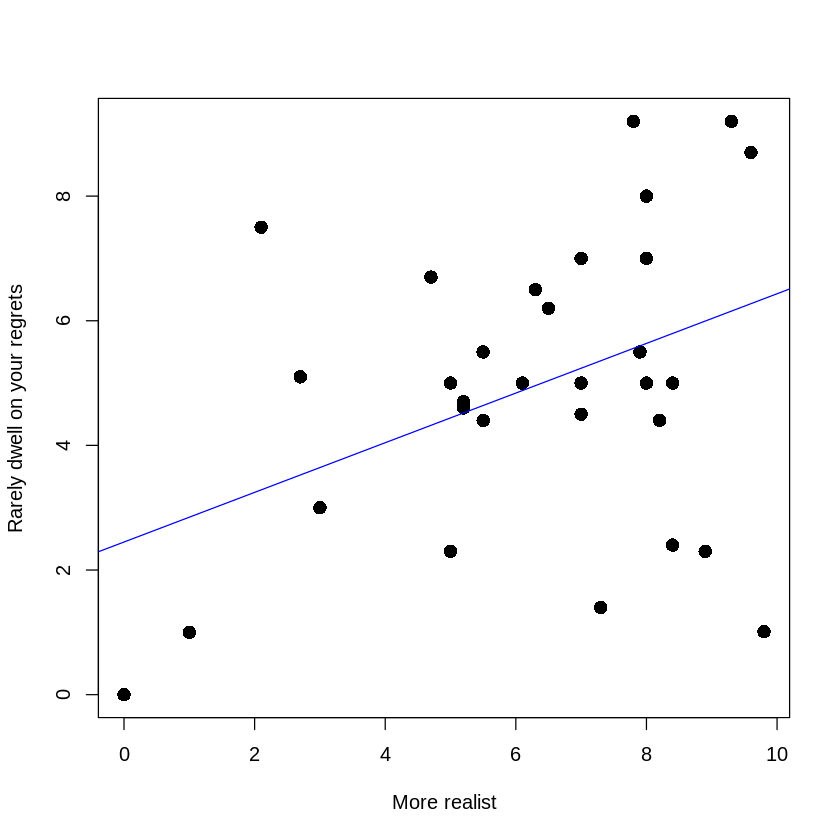

In [ ]:
plot(pd_new$realist,pd_new$look_beyond, pch=16,
  cex=1.5, xlab = "More realist",
  ylab = "Rarely dwell on your regrets")
  abline(lm(look_beyond ~ realist,
          data = pd_new), col = "blue")

pd.mod1 <- lm(look_beyond ~ realist, data = pd_new) 

- Summary of the plot states that Multiple R-squared:  0.172,	Adjusted R-squared:  0.1462

- I will use Adjusted R-squared to compare because it can provide a more precise view of that correlation by also taking into account how many independent variables are added



**Note** : a higher R-squared indicates the model is a good fit

In [ ]:
summary(pd.mod1)


Call:
lm(formula = realist ~ look_beyond, data = pd_new)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.2044 -0.9295 -0.0738  1.4098  5.2975 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.0659     0.9181   4.429 0.000104 ***
look_beyond   0.4318     0.1675   2.578 0.014729 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.371 on 32 degrees of freedom
Multiple R-squared:  0.172,	Adjusted R-squared:  0.1462 
F-statistic: 6.649 on 1 and 32 DF,  p-value: 0.01473


- Model plot between how much a person is realist against if he/she is dedicated.

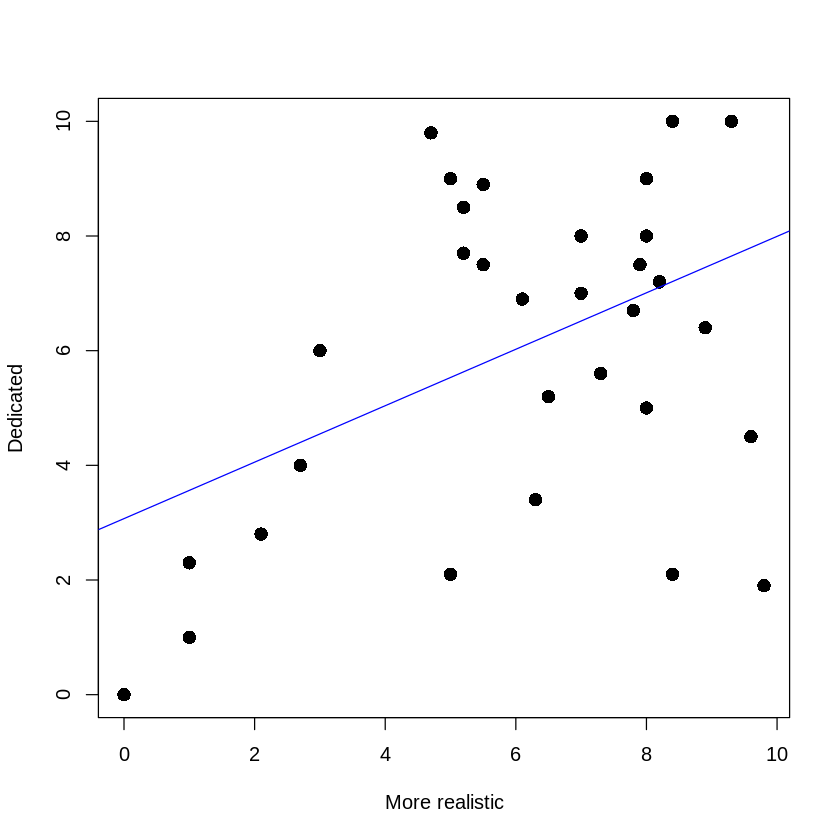

In [ ]:
plot(pd_new$realist,pd_new$dedicated, pch=16,
  cex=1.5, xlab = "More realistic",
  ylab = "Dedicated")
  abline(lm(dedicated ~ realist,
          data = pd_new), col = "blue")
pd.mod2 <- lm(dedicated ~ realist, data = pd_new) 

Multiple R-squared:  0.2035,	Adjusted R-squared:  0.1786 

In [ ]:
summary(pd.mod2)


Call:
lm(formula = dedicated ~ realist, data = pd_new)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.9958 -1.2946  0.4827  1.9231  4.4150 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   3.0711     1.1511   2.668  0.01188 * 
realist       0.4923     0.1722   2.859  0.00742 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.539 on 32 degrees of freedom
Multiple R-squared:  0.2035,	Adjusted R-squared:  0.1786 
F-statistic: 8.173 on 1 and 32 DF,  p-value: 0.007421


- Model plot between how much a person is realist against if he/she is systematic.

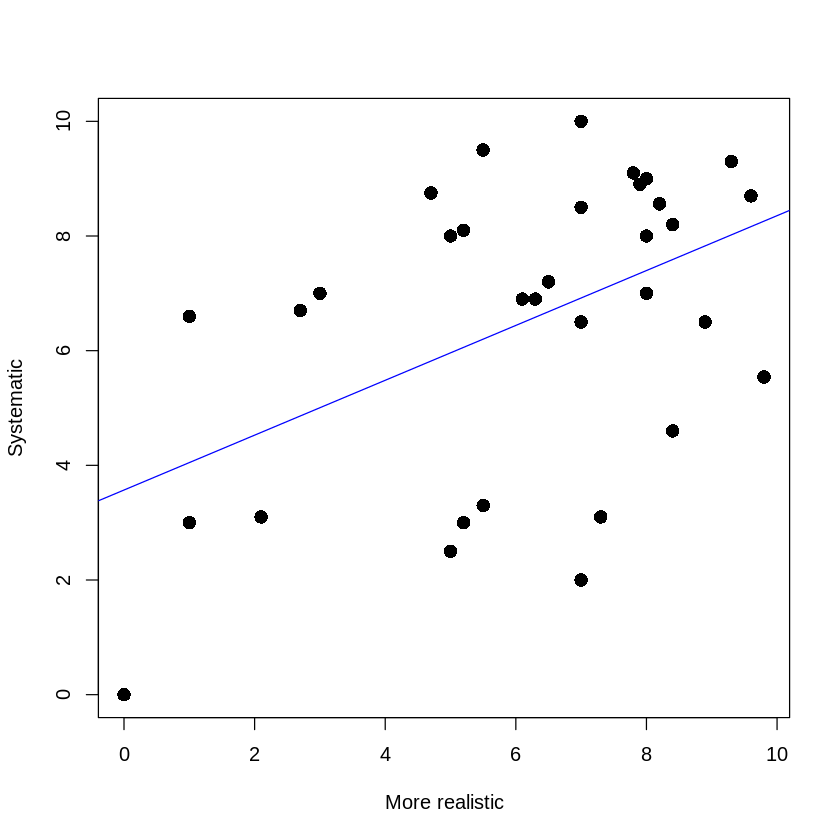

In [ ]:
plot(pd_new$realist,pd_new$systematic, pch=16,
  cex=1.5, xlab = "More realistic",
  ylab = "Systematic")
  abline(lm(systematic ~ realist,
          data = pd_new), col = "blue")

pd.mod3 <- lm(systematic ~ realist, data = pd_new) 

In [ ]:
summary(pd.mod3)


Call:
lm(formula = systematic ~ realist, data = pd_new)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9193 -1.4380  0.5693  1.7489  3.2985 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   3.5696     1.0472   3.409  0.00178 **
realist       0.4785     0.1567   3.055  0.00452 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.309 on 32 degrees of freedom
Multiple R-squared:  0.2258,	Adjusted R-squared:  0.2016 
F-statistic: 9.331 on 1 and 32 DF,  p-value: 0.004516


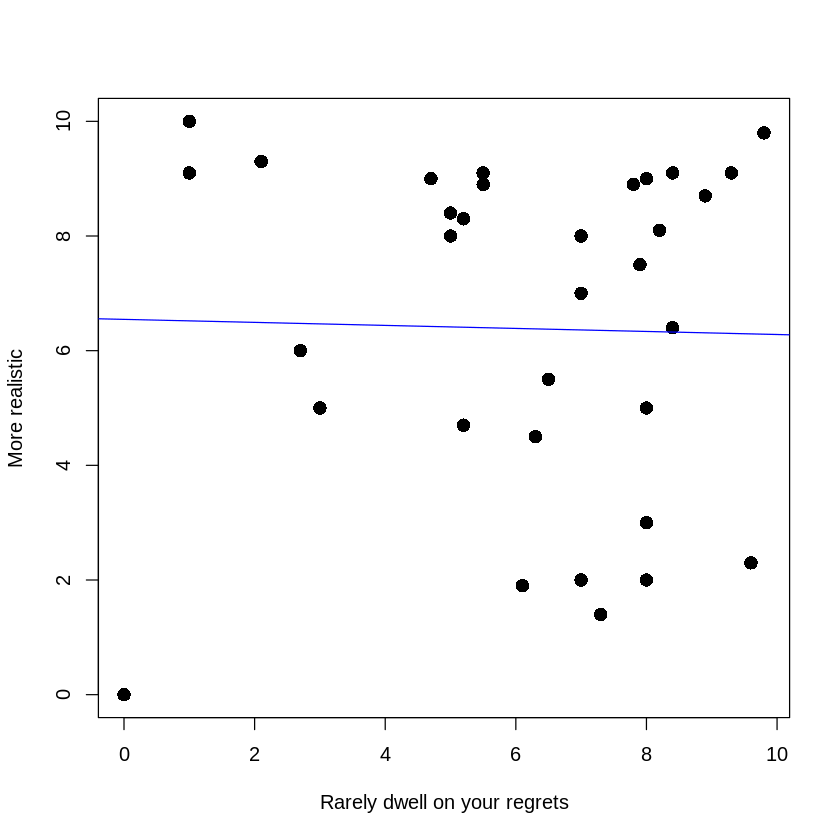

In [ ]:
plot(pd_new$realist,pd_new$introvert_1, pch=16,
  cex=1.5, xlab = "Rarely dwell on your regrets",
  ylab = "More realistic")
  abline(lm(introvert_1 ~ realist,
          data = pd_new), col = "blue")

pd.mod4 <- lm(introvert_1 ~ realist, data = pd_new) 

In [ ]:
summary(pd.mod4)


Call:
lm(formula = introvert_1 ~ realist, data = pd_new)

Residuals:
   Min     1Q Median     3Q    Max 
-6.546 -1.837  1.375  2.574  3.513 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.5457     1.3756   4.758    4e-05 ***
realist      -0.0264     0.2058  -0.128    0.899    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.034 on 32 degrees of freedom
Multiple R-squared:  0.0005141,	Adjusted R-squared:  -0.03072 
F-statistic: 0.01646 on 1 and 32 DF,  p-value: 0.8987


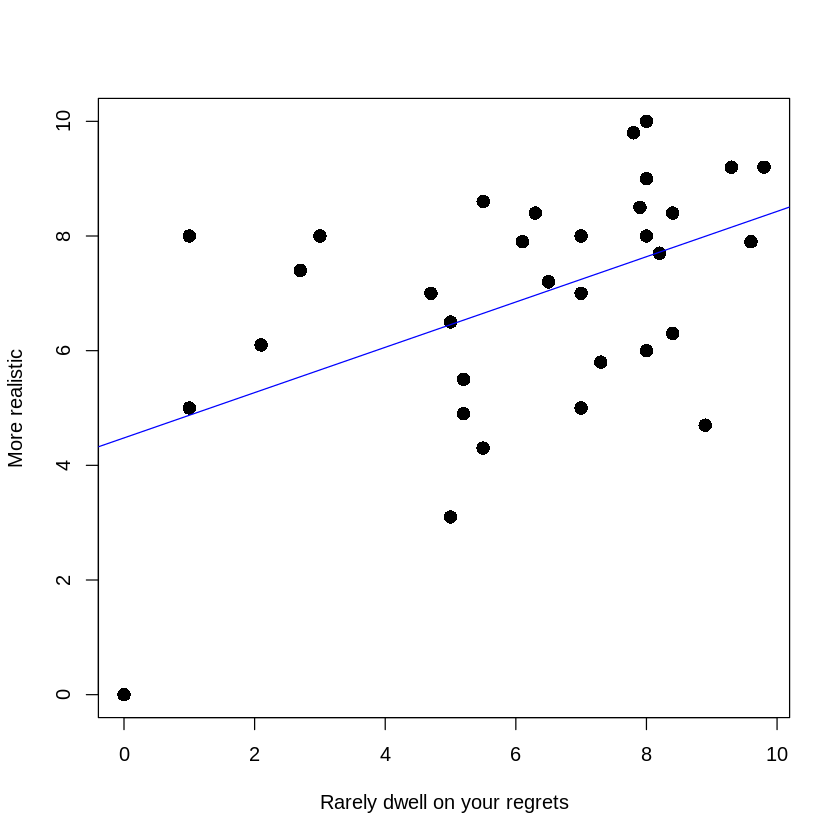

In [ ]:
plot(pd_new$realist,pd_new$make_objectives, pch=16,
  cex=1.5, xlab = "Rarely dwell on your regrets",
  ylab = "More realistic")
  abline(lm(make_objectives ~ realist,
          data = pd_new), col = "blue")

pd.mod5 <- lm(make_objectives ~ realist, data = pd_new) 

In [ ]:
summary(pd.mod5)


Call:
lm(formula = make_objectives ~ realist, data = pd_new)

Residuals:
   Min     1Q Median     3Q    Max 
-4.479 -1.381  0.257  1.038  3.126 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.4786     0.8287   5.404 6.13e-06 ***
realist       0.3951     0.1240   3.187   0.0032 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.828 on 32 degrees of freedom
Multiple R-squared:  0.2409,	Adjusted R-squared:  0.2172 
F-statistic: 10.16 on 1 and 32 DF,  p-value: 0.003204


##Model Comparison

In this section I have compared each model above with eachother to find the p value.

In [ ]:
anova(pd.mod1, pd.mod2)

Warning message in anova.lmlist(object, ...):
“models with response ‘"dedicated"’ removed because response differs from model 1”


Df Sum Sq    Mean Sq   F value Pr(>F)    
realist    1  34.49061 34.490608 6.64855 0.01472904
Residuals 32 166.00603  5.187689      NA         NA

In [ ]:
anova(pd.mod3, pd.mod4)

Warning message in anova.lmlist(object, ...):
“models with response ‘"introvert_1"’ removed because response differs from model 1”


Df Sum Sq    Mean Sq   F value  Pr(>F)     
realist    1  49.76273 49.762726 9.330736 0.004516184
Residuals 32 170.66255  5.333205       NA          NA

In [ ]:
anova(pd.mod2, pd.mod5)

Warning message in anova.lmlist(object, ...):
“models with response ‘"make_objectives"’ removed because response differs from model 1”


Df Sum Sq    Mean Sq   F value  Pr(>F)     
realist    1  52.67108 52.671078 8.173252 0.007420642
Residuals 32 206.21833  6.444323       NA          NA

In [ ]:
anova(pd.mod3, pd.mod5)

Warning message in anova.lmlist(object, ...):
“models with response ‘"make_objectives"’ removed because response differs from model 1”


Df Sum Sq    Mean Sq   F value  Pr(>F)     
realist    1  49.76273 49.762726 9.330736 0.004516184
Residuals 32 170.66255  5.333205       NA          NA

In [ ]:
anova(pd.mod4, pd.mod1)

Warning message in anova.lmlist(object, ...):
“models with response ‘"look_beyond"’ removed because response differs from model 1”


Df Sum Sq      Mean Sq   F value    Pr(>F)   
realist    1   0.1514566 0.1514566 0.01645832 0.8987224
Residuals 32 294.4779551 9.2024361         NA        NA

##Multiple Linear Regression

- Let's create a multiple regression model from our data frame.
- I will use the same columns used above.


In [ ]:
model <- lm(realist ~ look_beyond + dedicated + introvert_1 + make_objectives + systematic, data = pd_new)

- This prints the coefficients of each variable.

In [ ]:
print(model)


Call:
lm(formula = realist ~ look_beyond + dedicated + introvert_1 + 
    make_objectives + systematic, data = pd_new)

Coefficients:
    (Intercept)      look_beyond        dedicated      introvert_1  
         1.3755           0.1416           0.1808          -0.0389  
make_objectives       systematic  
         0.3546           0.1230  



In [ ]:
summary(model)


Call:
lm(formula = realist ~ look_beyond + dedicated + introvert_1 + 
    make_objectives + systematic, data = pd_new)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5151 -1.2604  0.0939  1.0434  4.3749 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)
(Intercept)       1.3755     1.6213   0.848    0.403
look_beyond       0.1416     0.1928   0.734    0.469
dedicated         0.1808     0.1853   0.976    0.337
introvert_1      -0.0389     0.1333  -0.292    0.773
make_objectives   0.3547     0.2382   1.489    0.148
systematic        0.1230     0.2240   0.549    0.587

Residual standard error: 2.254 on 28 degrees of freedom
Multiple R-squared:  0.3455,	Adjusted R-squared:  0.2286 
F-statistic: 2.956 on 5 and 28 DF,  p-value: 0.02892


- here I have created an eqaution for multiple regression that finds how much of a person is realist scale (0-10) using an eqaution below.

In [ ]:
Y = a+Xlook_beyond*5+Xdedicated*5+Xintrovert_1*5
Y

(Intercept) 
   2.793304

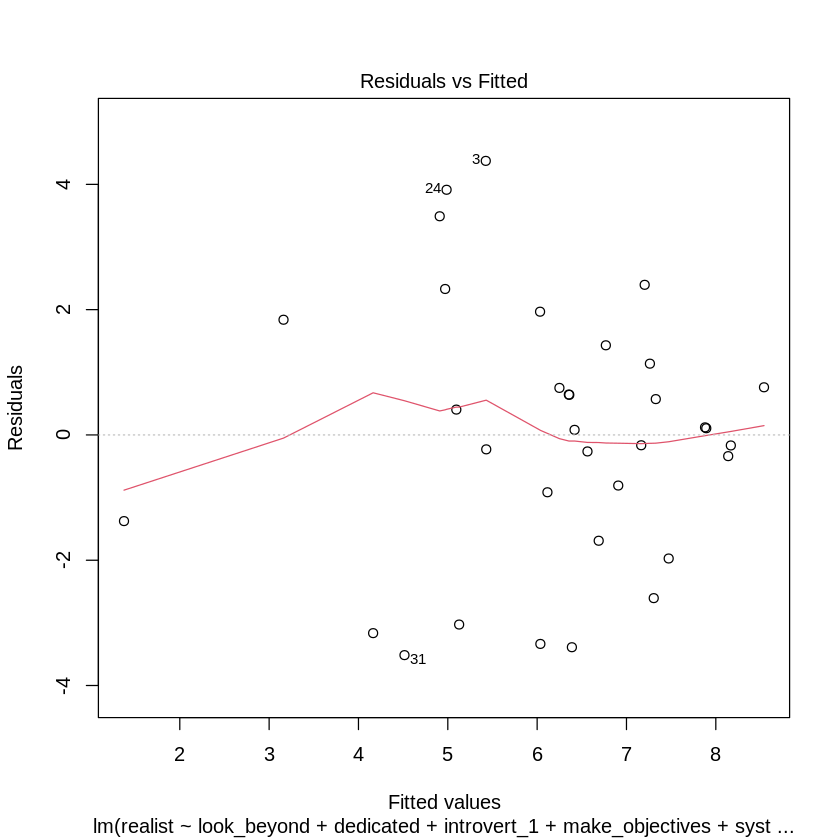

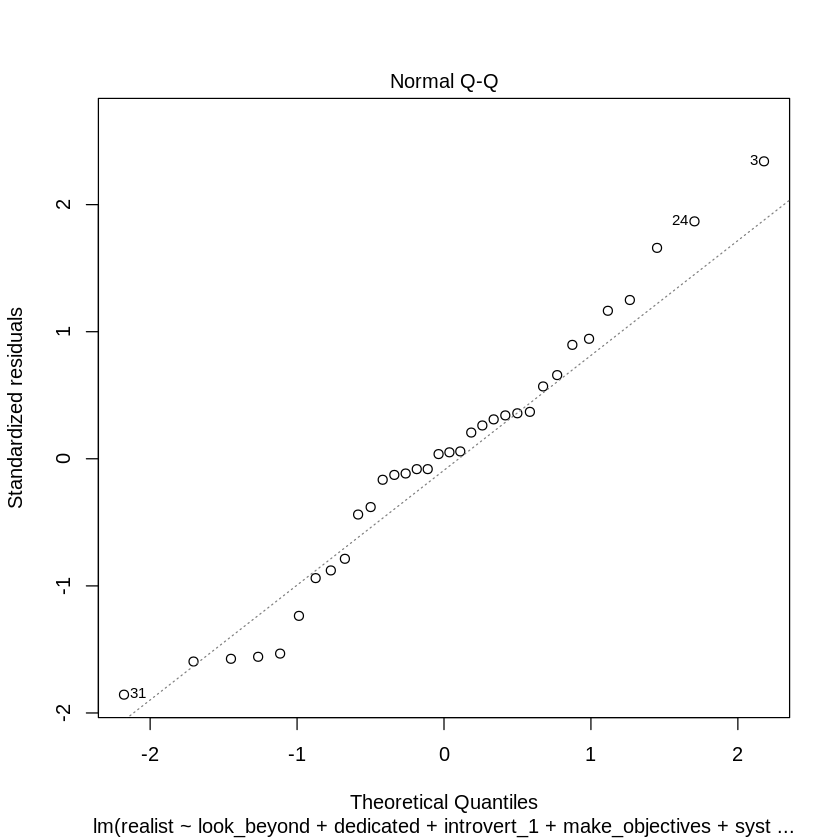

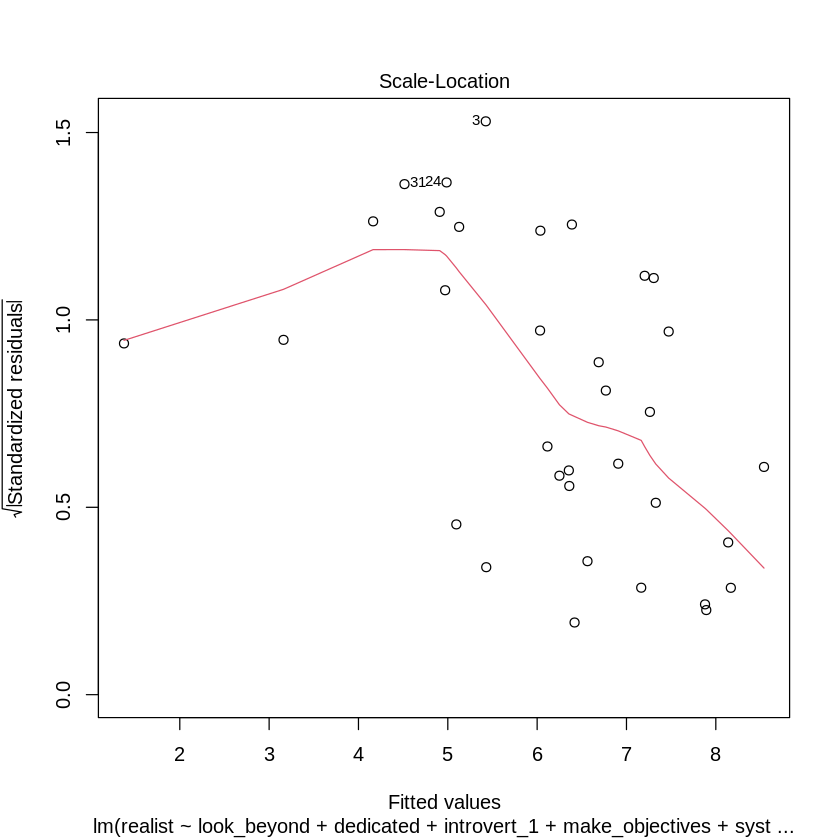

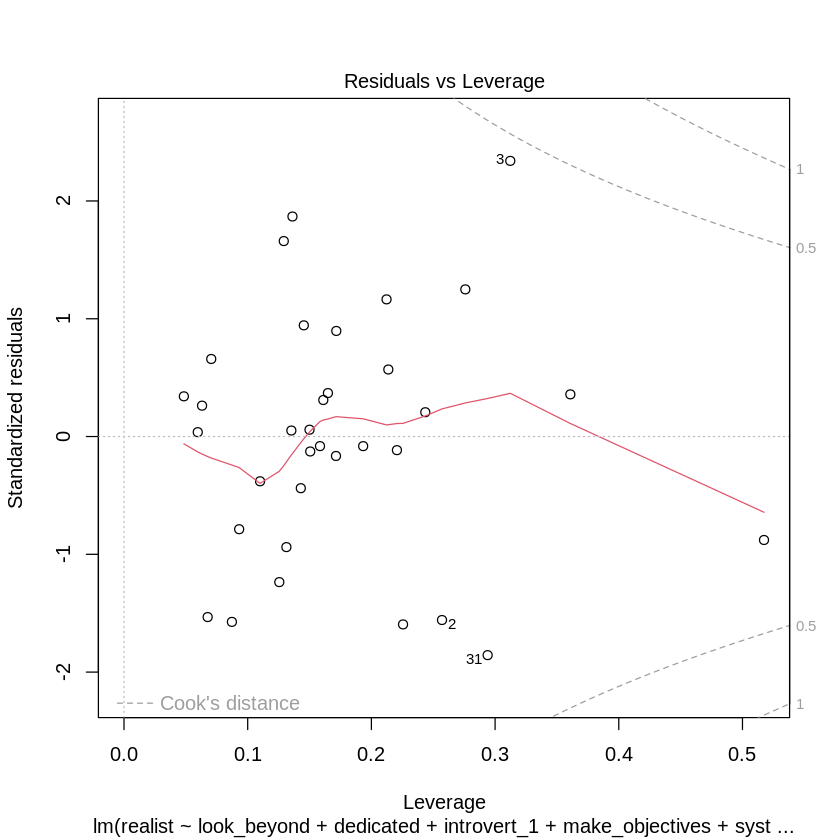

In [ ]:
plot(model)

##Summary
- First of all not everyone who was assigned to complete the questionairre finished it, hence incomplete dataset.
- had to deal with all those null values.
- Then i used Realist column to find any correlatin between other columns such as: If a person is dedicated, introvert, If he looks beyond his reach ie future plans, and if he is organised.
- Then I compared model in parts 4 section using the anova library to find the p value.
- In the multiple regression section i generated an eqaution using the coefficients fro the models to calculate how much of a person is realist on a scale from 0 - 10.

##Recommendations
- As from the referece of the above study i can recommend to San Francisco County's representatives regarding analyis of the personality of the students of the data science to improve law and enjoyable life of the San Francisco people to outcomes of the study make decisions. people plans of tarveling and other factors like plans hold extrovert and social event are most cancel to some resons in my study. so, representive have any sceam to easy for people to take time for their enjoyment and personality.In the end every person nature is different so it is difficult to set all thing to all people but San Francisco County's representatives take some can check above outcomes of study.